# M2 Project
Author: Marcel Grosjean


Import the necessary packages:

In [2]:
import requests
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
from scipy import stats
from matplotlib.ticker import MaxNLocator
from scipy.stats import normaltest


First get all the results from the tests:

In [4]:
df = pd.read_csv("https://static.grosjean.io/cas/M2/M2-data.txt", sep=";")
print(f"Number of rows: {len(df)}")
print(f"Number of distincts users: {df['userid'].nunique()}")
print(f"Min, Max attempts: {df['attempt'].min()}, {df['attempt'].max()}")
print(f"Min, Max points: {df['points'].min()}, {df['points'].max()}")
df.head()

Number of rows: 12657
Number of distincts users: 1212
Min, Max attempts: 1, 25
Min, Max points: -151, 400


,userid,name,attempt,points,date
0,950,Algorithmes et opérations,1,195,02.06.2022
1,950,Algorithmes et opérations,2,306,11.08.2022
2,950,Algorithmes et opérations,3,209,02.06.2022
3,950,Ensembles et logique,1,181,02.06.2022
4,950,Nombres et opérations,1,199,05.06.2022


Plot some data

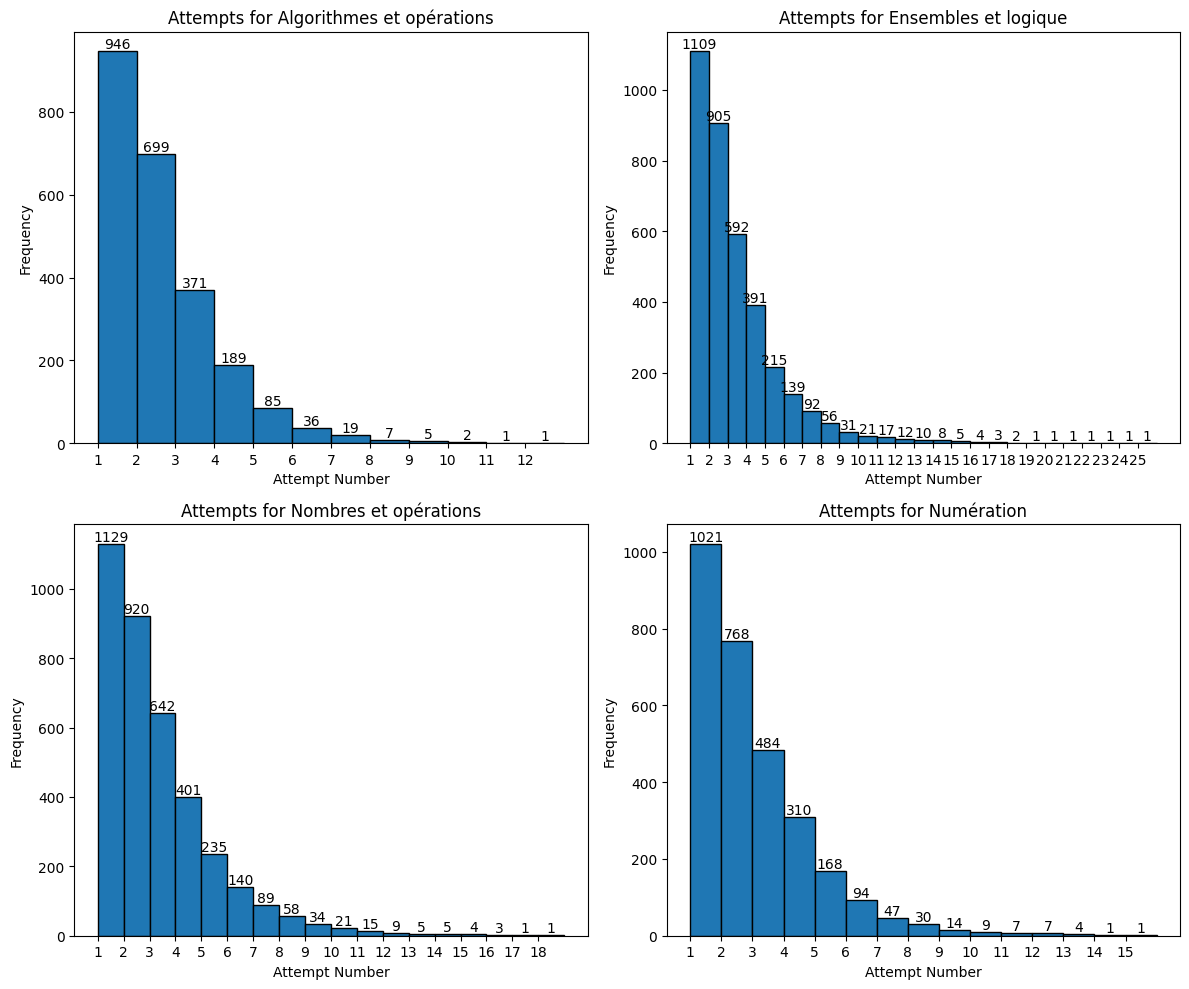

In [5]:
# Get the unique names
unique_names = df['name'].unique()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot the number of attempts for each name
for i, name in enumerate(unique_names):
    # Filter data for the specific name
    name_data = df[df['name'] == name]

    # Plot the histogram of attempts for the specific name
    bins = range(1, name_data['attempt'].max() + 2)
    n, bins, patches = axes[i].hist(name_data['attempt'], bins=bins, edgecolor='black', align='mid')

    # Set title and labels
    axes[i].set_title(f"Attempts for {name}")
    axes[i].set_xlabel('Attempt Number')
    axes[i].set_ylabel('Frequency')

    # Set x-axis ticks to integers
    axes[i].set_xticks(bins[:-1])  # Remove the last bin edge to avoid an extra tick

    # Add the count on top of each bar
    for patch, value in zip(patches, n):
        height = patch.get_height()
        if height > 0:
            axes[i].text(patch.get_x() + patch.get_width() / 2, height, int(value),
                         ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Plot the number of points for each test

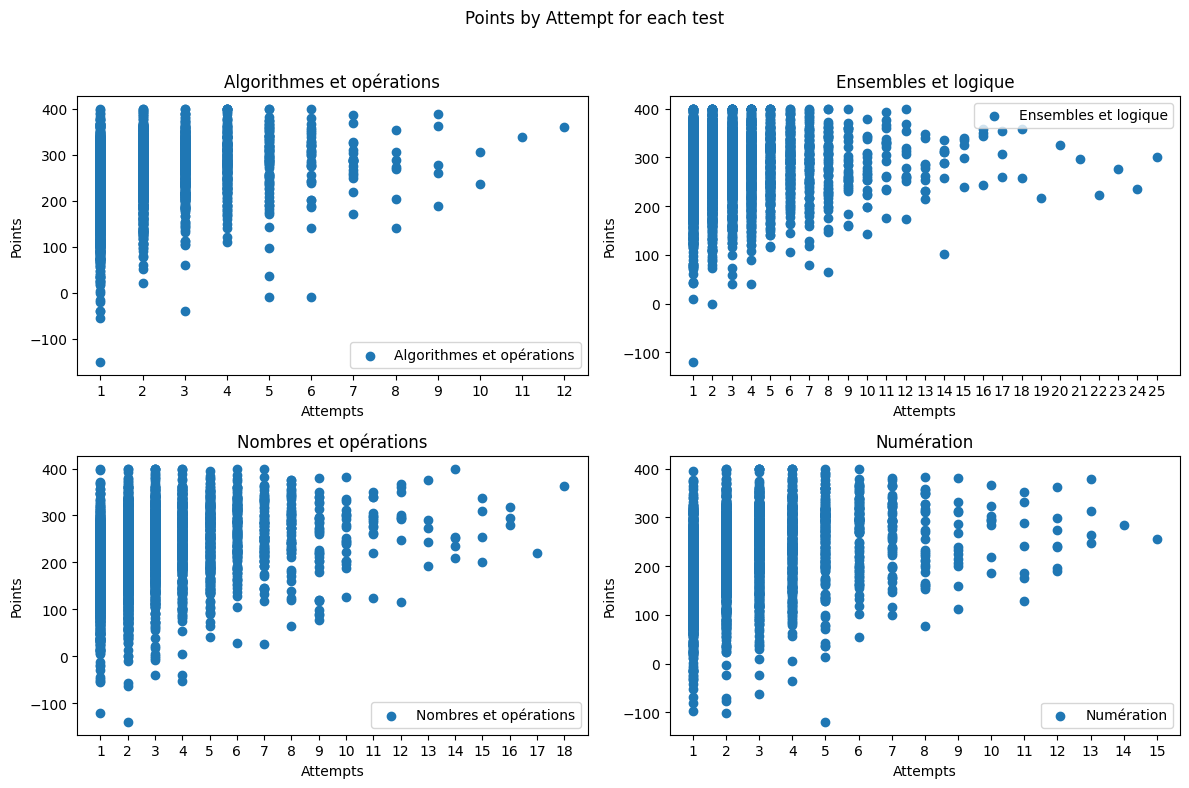

In [6]:
# Extract the unique names for plotting
names = df['name'].unique()

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Points by Attempt for each test")

# Iterate through each subplot and plot only the points for each name
for i, name in enumerate(names):
    ax = axs[i//2, i%2]
    subset = df[df['name'] == name]
    ax.scatter(subset['attempt'], subset['points'], marker='o', label=name)
    ax.set_title(name)
    ax.set_xlabel('Attempts')
    ax.set_ylabel('Points')
    ax.legend()

    # Set x-axis as integers with a step of 1
    ax.set_xticks(range(int(subset['attempt'].min()), int(subset['attempt'].max()) + 1))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Plot the average values in a histogram:

Let plot some averages:

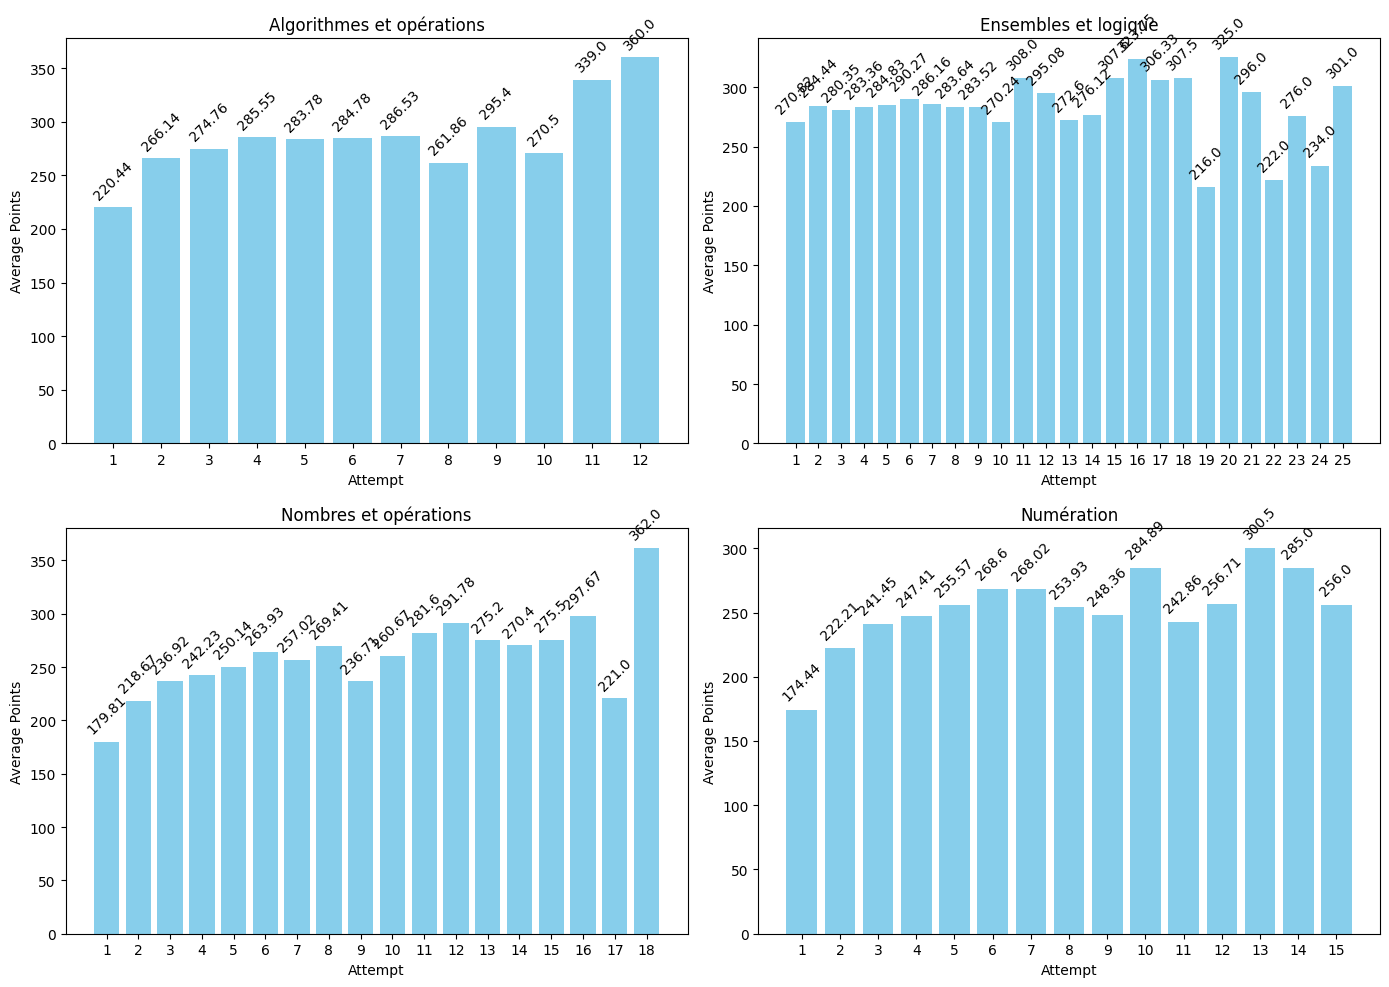

In [7]:
# Get unique names for subplots
unique_names = df['name'].unique()

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each unique name to create subplots
for i, name in enumerate(unique_names):
    # Filter data for the current name
    df_name = df[df['name'] == name]

    # Group by attempt and calculate the average points
    grouped = df_name.groupby('attempt')['points'].mean().reset_index()

    # Create a histogram-like bar chart
    axes[i].bar(grouped['attempt'], grouped['points'], color='skyblue')

    # Set title and labels
    axes[i].set_title(name)
    axes[i].set_xlabel('Attempt')
    axes[i].set_ylabel('Average Points')

    # Set X-axis range to min and max attempts with step of 1
    axes[i].set_xticks(np.arange(grouped['attempt'].min(), grouped['attempt'].max() + 1, 1))

    # Annotate the bars with the average values at the top, rotated 45°
    for index, row in grouped.iterrows():
        axes[i].text(row['attempt'], row['points'] + 5, round(row['points'], 2), ha='center', va='bottom', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Let's take the exam data:

In [6]:
df_exam = pd.read_csv("https://static.grosjean.io/cas/M2/M2-exam-final.txt", sep=";")
print(df_exam['points'].describe())
df_exam.head()

count    1179.000000
mean      204.621713
std        63.732471
min       -16.000000
25%       164.000000
50%       208.000000
75%       250.000000
max       373.000000
Name: points, dtype: float64


,userid,points,name,date
0,1285,250,Examen à blanc,05.05.2022
1,1300,318,Examen à blanc,05.05.2022
2,1166,166,Examen à blanc,05.05.2022
3,1165,332,Examen à blanc,05.05.2022
4,1182,145,Examen à blanc,05.05.2022


Get some descriptive data on the points:

In [21]:
df_exam['points'].describe()

,points
count,1179.000000
mean,204.621713
std,63.732471
min,-16.000000
25%,164.000000
50%,208.000000
75%,250.000000
max,373.000000


Plot some results:

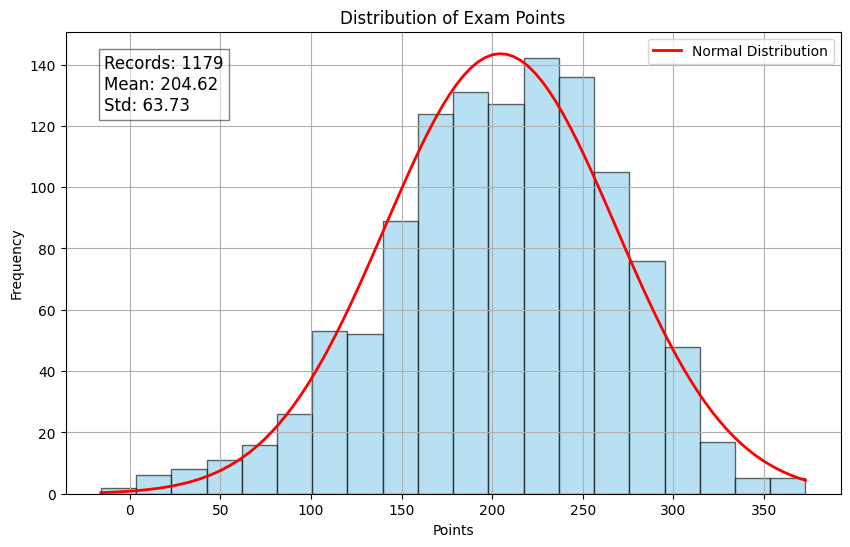

In [121]:
# Calculate mean and standard deviation
mean = df_exam['points'].mean()
std = df_exam['points'].std()

# Create an array of points for the normal distribution
x = np.linspace(min(df_exam['points']), max(df_exam['points']), 100)
y = stats.norm.pdf(x, mean, std)

# Re-plot with the y-axis representing frequency (not density)
plt.figure(figsize=(10, 6))
plt.hist(df_exam['points'], bins=20, color='skyblue', edgecolor='black', alpha=0.6)
plt.plot(x, y * len(df_exam['points']) * np.diff(np.histogram(df_exam['points'], bins=20)[1])[0],
         color='red', linewidth=2, label='Normal Distribution')

# Display mean and std on the plot
plt.text(0.05, 0.95, f'Records: {len(df_exam)}\nMean: {mean:.2f}\nStd: {std:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Distribution of Exam Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Create some samples:

We are going to make the following samples:
- No Preparation: Students who took the exam without any preparation
- Low Preparation: Students who took a small number of tests (e.g., 1-4 tests).
- Medium Preparation: Students who did a moderate number of tests (e.g., 5-8).
- High Preparation: Students who did extensive preparation (e.g., 9+).

First, make a sample *no_preparation* with student that took the exam without any preparation:

In [89]:
df_userids = set(df['userid'])
df_exam_userids = set(df_exam['userid'])
# we take all the users that have taken no preparation test and only the exam
userids_not_in_df = df_exam_userids - df_userids

# we take all the users in the df dataset that have theirs userid matching userids_not_in_df
no_preparation = df_exam[df_exam['userid'].isin(userids_not_in_df)]
no_preparation_mean = no_preparation['points'].mean()
no_preparation_std = no_preparation['points'].std()
print(no_preparation['points'].describe())
no_preparation.head()


count     59.000000
mean     178.813559
std       70.068802
min       34.000000
25%      135.000000
50%      186.000000
75%      232.500000
max      306.000000
Name: points, dtype: float64


,userid,points,name,date
85,117,120,Examen à blanc,17.05.2022
98,1519,68,Examen à blanc,19.05.2022
106,1523,79,Examen à blanc,20.05.2022
110,1524,288,Examen à blanc,21.05.2022
148,1305,186,Examen à blanc,30.05.2022


We compute the number of preparation tests for each students:

In [90]:
# all unique userid
df_preparation = set(df['userid'])
# turn df_preparation into a panda dataset
df_preparation = pd.DataFrame(list(df_preparation), columns=['userid'])

# add to the df_preparation a column named "Preparation" that is the number of times the userid appeared in the df dataframe
df_preparation['Preparation'] = df_preparation['userid'].apply(lambda x: len(df[df['userid'] == x]))
df_preparation

,userid,Preparation
0,2048,6
1,2052,1
2,2054,3
3,2072,15
4,2087,9
...,...,...
1207,2039,4
1208,2040,5
1209,2043,3
1210,2045,4


Now create the 3 samples:

Create the low_preparation sample:

In [91]:
# take all the userids from df_preparation that have done between 1 and 3 Preparation
low_preparation_userids = df_preparation[(df_preparation['Preparation'] >= 1) & (df_preparation['Preparation'] <= 4)]

# take all the data from the df_exam where the userid match low_preparation_userids
low_preparation = df_exam[df_exam['userid'].isin(low_preparation_userids['userid'])]
low_preparation_mean = low_preparation['points'].mean()
low_preparation_std = low_preparation['points'].std()
print(low_preparation['points'].describe())
low_preparation

count    205.000000
mean     186.956098
std       72.040586
min       -2.000000
25%      140.000000
50%      185.000000
75%      243.000000
max      338.000000
Name: points, dtype: float64


,userid,points,name,date
20,1508,236,Examen à blanc,07.05.2022
26,1509,173,Examen à blanc,07.05.2022
28,1328,324,Examen à blanc,08.05.2022
31,1274,112,Examen à blanc,09.05.2022
34,1201,-2,Examen à blanc,09.05.2022
...,...,...,...,...
1164,2514,102,Examen à blanc,10.06.2024
1165,2099,118,Examen à blanc,10.06.2024
1166,2502,203,Examen à blanc,10.06.2024
1167,2266,120,Examen à blanc,10.06.2024


Create the medium_preparation sample:

In [92]:
# take all the userids from df_preparation that have done between 1 and 3 Preparation
medium_preparation_userids = df_preparation[(df_preparation['Preparation'] >= 5) & (df_preparation['Preparation'] <= 8)]

# take all the data from the df_exam where the userid match low_preparation_userids
medium_preparation = df_exam[df_exam['userid'].isin(medium_preparation_userids['userid'])]
medium_preparation_mean = medium_preparation['points'].mean()
medium_preparation_std = medium_preparation['points'].std()
print(medium_preparation['points'].describe())
medium_preparation

count    294.000000
mean     203.401361
std       59.228160
min      -16.000000
25%      168.500000
50%      202.000000
75%      245.000000
max      360.000000
Name: points, dtype: float64


,userid,points,name,date
2,1166,166,Examen à blanc,05.05.2022
11,1494,92,Examen à blanc,06.05.2022
24,1341,146,Examen à blanc,07.05.2022
27,1163,185,Examen à blanc,08.05.2022
30,1409,103,Examen à blanc,09.05.2022
...,...,...,...,...
1172,2355,288,Examen à blanc,16.08.2024
1173,2109,153,Examen à blanc,19.08.2024
1174,2376,192,Examen à blanc,23.08.2024
1176,2516,160,Examen à blanc,25.08.2024


Create the high_preparation sample:

In [103]:
# take all the userids from df_preparation that have done between 1 and 3 Preparation
high_preparation_userids = df_preparation[df_preparation['Preparation'] >= 9]

# take all the data from the df_exam where the userid match low_preparation_userids
high_preparation = df_exam[df_exam['userid'].isin(high_preparation_userids['userid'])]
high_preparation_mean = high_preparation['points'].mean()
high_preparation_std = high_preparation['points'].std()
print(high_preparation['points'].describe())
high_preparation

count    621.000000
mean     213.483092
std       60.388995
min        5.000000
25%      174.000000
50%      220.000000
75%      256.000000
max      373.000000
Name: points, dtype: float64


,userid,points,name,date
0,1285,250,Examen à blanc,05.05.2022
1,1300,318,Examen à blanc,05.05.2022
3,1165,332,Examen à blanc,05.05.2022
4,1182,145,Examen à blanc,05.05.2022
5,1222,206,Examen à blanc,05.05.2022
...,...,...,...,...
1157,2449,256,Examen à blanc,09.06.2024
1169,2352,186,Examen à blanc,23.07.2024
1170,2387,109,Examen à blanc,06.08.2024
1171,2154,174,Examen à blanc,06.08.2024


Plot:

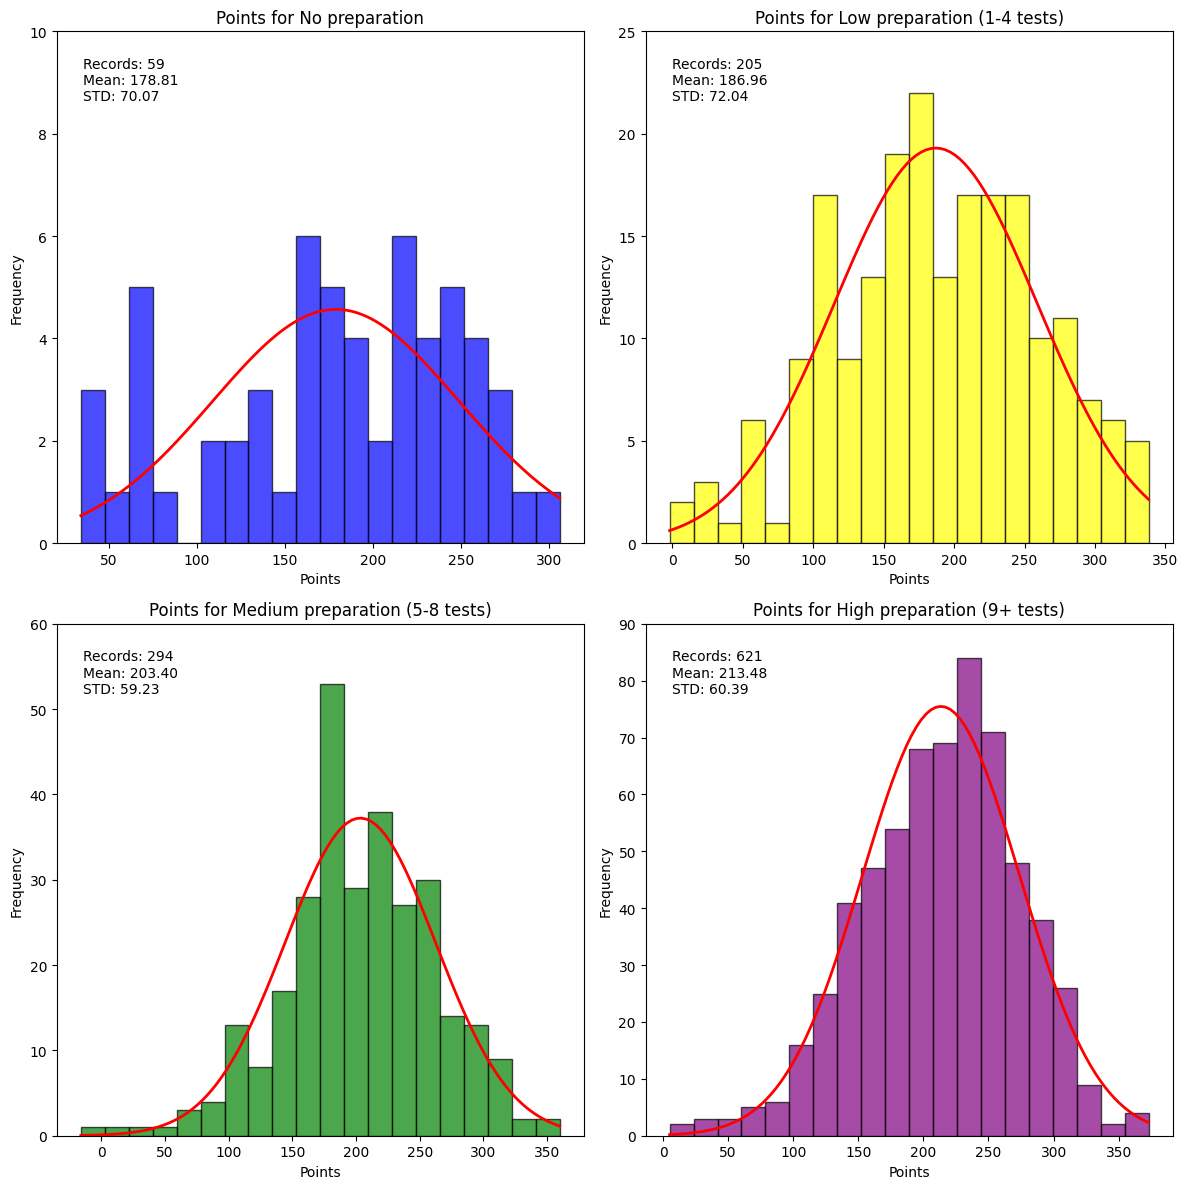

In [124]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12), sharex=False, tight_layout=True)

# Plot the histogram for the no preparation group
no_preparation['points'].plot(kind='hist', ax=ax1, color='blue', edgecolor='black', alpha=0.7, bins=20)
ax1.set_ylim(0, 10)
ax1.set_title('Points for No preparation')
ax1.set_xlabel('Points')
ax1.set_ylabel('Frequency')

# Plot the norm pdf for no preparation
x_no = np.linspace(no_preparation['points'].min(), no_preparation['points'].max(), 100)
pdf_no = norm.pdf(x_no, no_preparation_mean, no_preparation_std)
ax1.plot(x_no, pdf_no * len(no_preparation['points']) * (no_preparation['points'].max() - no_preparation['points'].min()) / 20, 'r', linewidth=2)

# Print std and mean
ax1.text(0.05, 0.95, f'Records: {len(no_preparation)}\nMean: {no_preparation_mean:.2f}\nSTD: {no_preparation_std:.2f}',
         transform=ax1.transAxes, fontsize=10, verticalalignment='top')

# Plot the histogram for the low preparation group
low_preparation['points'].plot(kind='hist', ax=ax2, density=False, color='yellow', edgecolor='black', alpha=0.7, bins=20)
ax2.set_ylim(0, 25)
ax2.set_title('Points for Low preparation (1-4 tests)')
ax2.set_xlabel('Points')
ax2.set_ylabel('Frequency')

# Plot the norm pdf for low preparation
x_low = np.linspace(low_preparation['points'].min(), low_preparation['points'].max(), 100)
pdf_low = norm.pdf(x_low, low_preparation_mean, low_preparation_std)
ax2.plot(x_low, pdf_low * len(low_preparation['points']) * (low_preparation['points'].max() - low_preparation['points'].min()) / 20, 'r', linewidth=2)

# Print std and mean
ax2.text(0.05, 0.95, f'Records: {len(low_preparation)}\nMean: {low_preparation_mean:.2f}\nSTD: {low_preparation_std:.2f}',
         transform=ax2.transAxes, fontsize=10, verticalalignment='top')

# Plot the histogram for the moderate preparation group
medium_preparation['points'].plot(kind='hist', ax=ax3, density=False, color='green', edgecolor='black', alpha=0.7, bins=20)
ax3.set_ylim(0, 60)
ax3.set_title('Points for Medium preparation (5-8 tests)')
ax3.set_xlabel('Points')
ax3.set_ylabel('Frequency')

# Plot the norm pdf for moderate preparation
x_medium = np.linspace(medium_preparation['points'].min(), medium_preparation['points'].max(), 100)
pdf_moderate = norm.pdf(x_medium, medium_preparation_mean, medium_preparation_std)
ax3.plot(x_medium, pdf_moderate * len(medium_preparation['points']) * (medium_preparation['points'].max() - medium_preparation['points'].min()) / 20, 'r', linewidth=2)

# Print std and mean
ax3.text(0.05, 0.95, f'Records: {len(medium_preparation)}\nMean: {medium_preparation_mean:.2f}\nSTD: {medium_preparation_std:.2f}',
         transform=ax3.transAxes, fontsize=10, verticalalignment='top')

# Plot the histogram for the high preparation group
high_preparation['points'].plot(kind='hist', ax=ax4, density=False, color='purple', edgecolor='black', alpha=0.7, bins=20)
ax4.set_ylim(0, 90)
ax4.set_title('Points for High preparation (9+ tests)')
ax4.set_xlabel('Points')
ax4.set_ylabel('Frequency')

# Plot the norm pdf for high preparation
x_high = np.linspace(high_preparation['points'].min(), high_preparation['points'].max(), 100)
pdf_high = norm.pdf(x_high, high_preparation_mean, high_preparation_std)
ax4.plot(x_high, pdf_high * len(high_preparation['points']) * (high_preparation['points'].max() - high_preparation['points'].min()) / 20, 'r', linewidth=2)

# Print std and mean
ax4.text(0.05, 0.95, f'Records: {len(high_preparation)}\nMean: {high_preparation_mean:.2f}\nSTD: {high_preparation_std:.2f}',
         transform=ax4.transAxes, fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()

# Test for normality
## qq-plot


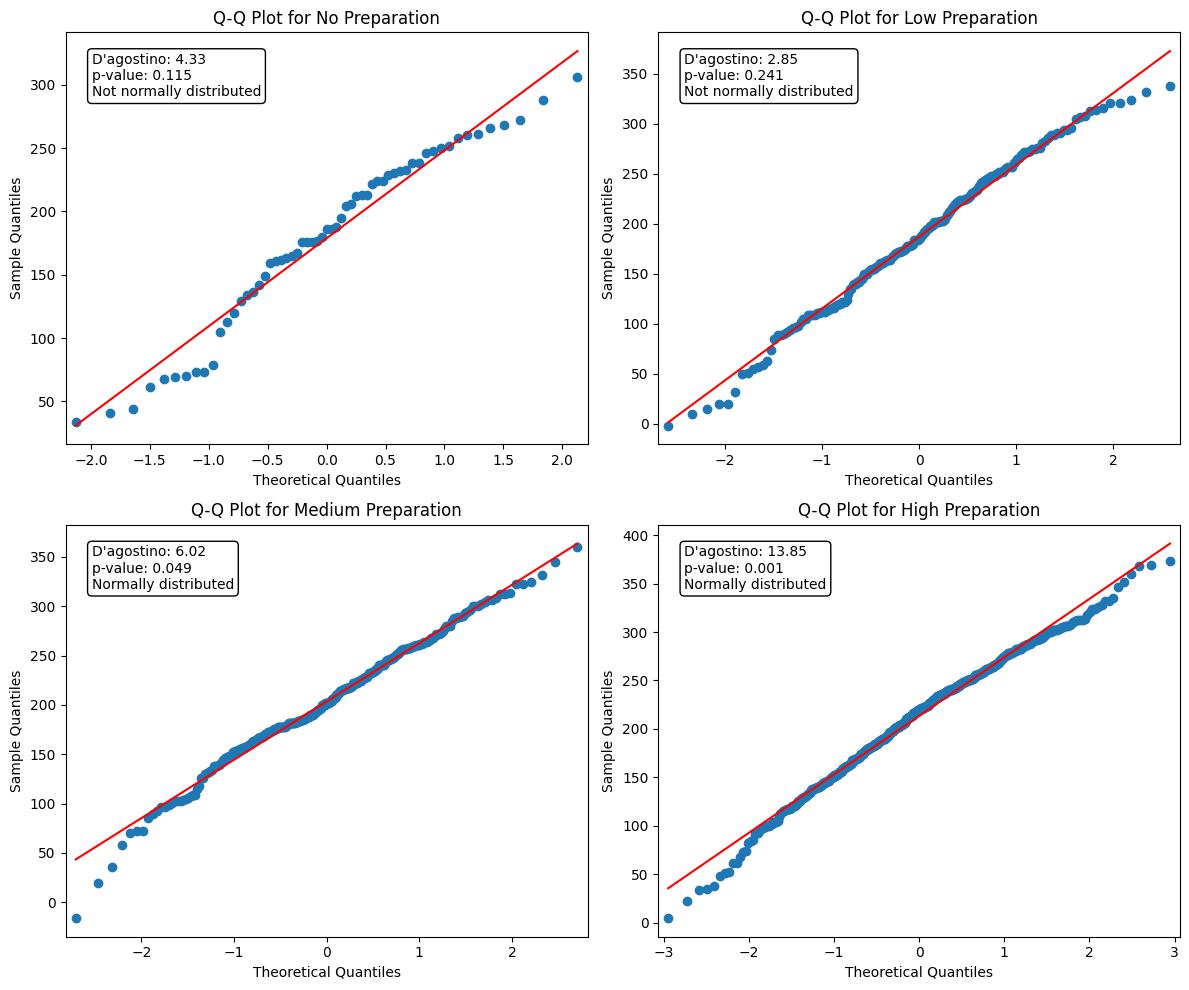

In [134]:
def nrm(p_value):
  return "Normally distributed" if p_value < 0.05 else "Not normally distributed"

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# First Q-Q plot (Pré-test)
sm.qqplot(no_preparation['points'], line='s', ax=axs[0, 0])
dagostino_no, p_no = normaltest(no_preparation['points'])
axs[0, 0].set_title('Q-Q Plot for No Preparation')
axs[0, 0].text(0.05, 0.95, f"D'agostino: {dagostino_no:.2f}\np-value: {p_no:.3f}\n{nrm(p_no)}", transform=axs[0, 0].transAxes,
               verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Second Q-Q plot (Post-test)
sm.qqplot(low_preparation['points'], line='s', ax=axs[0, 1])
dagostino_low, p_low = normaltest(low_preparation['points'])
axs[0, 1].set_title('Q-Q Plot for Low Preparation')
axs[0, 1].text(0.05, 0.95, f"D'agostino: {dagostino_low:.2f}\np-value: {p_low:.3f}\n{nrm(p_low)}", transform=axs[0, 1].transAxes,
               verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Third Q-Q plot (Another dataset or transformation of pre_test)
sm.qqplot(medium_preparation['points'], line='s', ax=axs[1, 0])
dagostino_medium, p_medium = normaltest(medium_preparation['points'])
axs[1, 0].set_title('Q-Q Plot for Medium Preparation')
axs[1, 0].text(0.05, 0.95, f"D'agostino: {dagostino_medium:.2f}\np-value: {p_medium:.3f}\n{nrm(p_medium)}", transform=axs[1, 0].transAxes,
               verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Fourth Q-Q plot (Another dataset or transformation of post_test)
sm.qqplot(high_preparation['points'], line='s', ax=axs[1, 1])
dagostino_high, p_high = normaltest(high_preparation['points'])
axs[1, 1].set_title('Q-Q Plot for High Preparation')
axs[1, 1].text(0.05, 0.95, f"D'agostino: {dagostino_high:.2f}\np-value: {p_high:.3f}\n{nrm(p_high)}", transform=axs[1, 1].transAxes,
               verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

plt.tight_layout()
plt.show()

# Tests

We will start by comparing the no preparation sample with all the others one by one:


In [142]:
print(f"== No preparation:")
print(f"Sample size: {len(no_preparation)}")
print(f"Mean: {no_preparation_mean}")
print(f"STD: {no_preparation_std}")
print(f"p-value: {p_no}")
print(nrm(p_no))
print()

print(f"== Low preparation:")
print(f"Sample size: {len(low_preparation)}")
print(f"Mean: {low_preparation_mean}")
print(f"STD: {low_preparation_std}")
print(f"p-value: {p_low}")
print(nrm(p_low))
print()

print(f"== Medium preparation:")
print(f"Sample size: {len(medium_preparation)}")
print(f"Mean: {medium_preparation_mean}")
print(f"STD: {medium_preparation_std}")
print(f"p-value: {p_medium}")
print(nrm(p_medium))
print()

print(f"== High preparation:")
print(f"Sample size: {len(high_preparation)}")
print(f"Mean: {high_preparation_mean}")
print(f"STD: {high_preparation_std}")
print(f"p-value: {p_high}")
print(nrm(p_high))
print()



== No preparation:
Sample size: 59
Mean: 178.8135593220339
STD: 70.06880228999337
p-value: 0.11473337679753762
Not normally distributed

== Low preparation:
Sample size: 205
Mean: 186.95609756097562
STD: 72.04058649361053
p-value: 0.24093616689734323
Not normally distributed

== Medium preparation:
Sample size: 294
Mean: 203.40136054421768
STD: 59.228159507861434
p-value: 0.04921859142041229
Normally distributed

== High preparation:
Sample size: 621
Mean: 213.4830917874396
STD: 60.388995371990845
p-value: 0.000984415068131693
Normally distributed



Now do the tests:

In [176]:
print(f"== No preparation vs Low preparation:")
print(f"Mann-Whitney U test")
stat, p_no_vs_low = stats.mannwhitneyu(no_preparation['points'], low_preparation['points'], alternative='two-sided')
print(f"p-value: {p_no_vs_low}")
print("Some training is better than no training") if p_no_vs_low < 0.05 else print("There is no difference")
print()

print(f"== No preparation vs Medium preparation:")
print(f"Unpaired t-test with Welsch's correction")
stat, p_no_vs_medium = stats.ttest_ind(no_preparation['points'], medium_preparation['points'], alternative='two-sided', equal_var = False)
print(f"p-value: {p_no_vs_medium}")
print("Medium training is better than no training") if p_no_vs_medium < 0.05 else print("There is no difference")
print()

print(f"== No preparation vs High preparation:")
print(f"Unpaired t-test with Welsch's correction")
stat, p_no_vs_high = stats.ttest_ind(no_preparation['points'], high_preparation['points'], alternative='two-sided', equal_var = False)
print(f"p-value: {p_no_vs_high}")
print("High training is better than no training") if p_no_vs_medium < 0.05 else print("There is no difference")
print()

print(f"No vs Low vs Medium vs High preparation:")
print(f"ANOVA")
# Perform one-way ANOVA
f_stat, p_value_anova = stats.f_oneway(no_preparation['points'], low_preparation['points'], medium_preparation['points'], high_preparation['points'])

print(f"ANOVA F-statistic: {f_stat}")
print(f"p-value: {p_value_anova}")
if p_value_anova < 0.05:
    print("You should prepare an exam !")
else:
    print("There is no difference")

== No preparation vs Low preparation:
Mann-Whitney U test
p-value: 0.6108184688413032
There is no difference

== No preparation vs Medium preparation:
Unpaired t-test with Welsch's correction
p-value: 0.01382127546118906
Medium training is better than no training

== No preparation vs High preparation:
Unpaired t-test with Welsch's correction
p-value: 0.0004797412882960717
High training is better than no training

No vs Low vs Medium vs High preparation:
ANOVA
ANOVA F-statistic: 12.891700973260647
p-value: 2.733805313900888e-08
You should prepare an exam !
